In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
alpha_values = [0.6, 0.7, 0.8, 0.9, 1.0]
alpha_to_hardcoded_data = dict()
alpha_to_rl_data = dict()

for alpha in alpha_values:
    data = np.load(f"hardcoded_data_{alpha}.npy")
    alpha_to_hardcoded_data[alpha] = data
    rl_data = np.load(f"alpha={alpha}_data.npy")
    alpha_to_rl_data[alpha] = rl_data


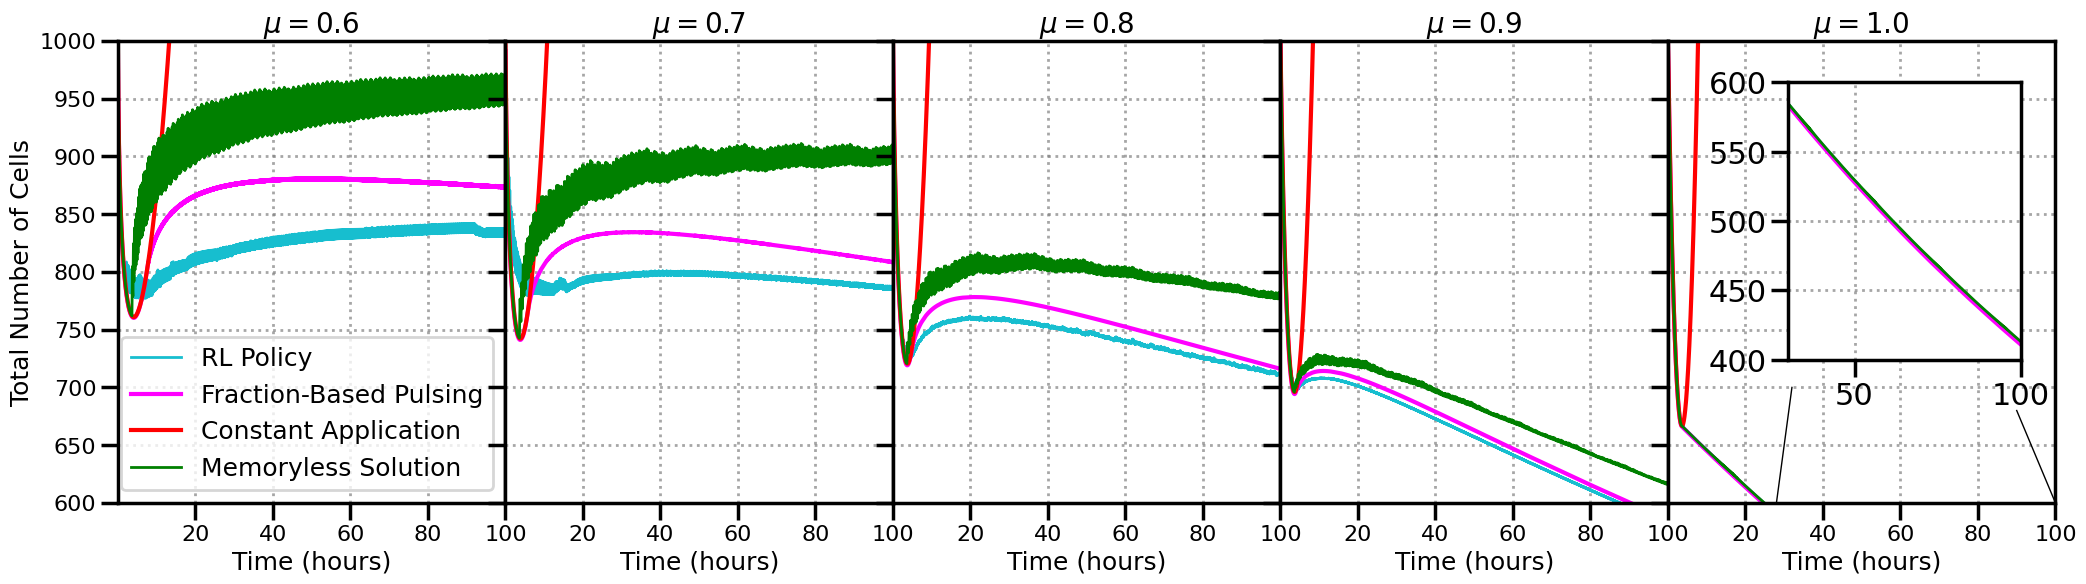

In [29]:
num_alphas = len(alpha_values)

# Create a figure with a horizontal grid of subplots
fig, axs = plt.subplots(1, num_alphas, figsize=(5 * num_alphas, 6), sharey=True)

for i, alpha in enumerate(alpha_values):
    ax = axs[i]  # Select the i-th subplot

    # Unpack the data:
    all_obs, all_actions, all_fractions = alpha_to_rl_data[alpha]
    t_hardcoded, hardcoded = alpha_to_hardcoded_data[alpha]

    # Plot RL Policy
    times = np.linspace(0, 100, len(all_obs))

    ax.plot(times, all_obs, label='RL Policy', color='#17becf', linestyle='-', linewidth=2)

    # Plot Hardcoded Solution
    ax.plot(t_hardcoded, hardcoded, label='Fraction-Based Pulsing', color='magenta', linestyle='-', linewidth=3)

    # Get the constant application data:
    const_obs = np.load(f"const_{alpha}.npy")
    const_t = np.linspace(0, 100, len(const_obs))
    ax.plot(const_t, const_obs, label='Constant Application', color='red', linestyle='-', linewidth=3)

    # Get the pulsatile data:
    pulsatile_obs = np.load(f"pulsatile_{alpha}.npy")
    pulsatile_t = np.linspace(0, 100, len(pulsatile_obs))
    ax.plot(pulsatile_t, pulsatile_obs, label='Memoryless Solution', color='green', linestyle='-', linewidth=2)

    # Styling
    ax.set_xlim(0.01, 100)
    ax.set_ylim(600, 1000)
    ax.set_xlabel('Time (hours)', fontsize=18)
    if i == 0:
        ax.set_ylabel('Total Number of Cells', fontsize=18)
    else:
        ax.set_ylabel('')
    if i == 0:
        ax.legend(fontsize=18, loc='lower right')
    ax.grid(True, linestyle=':', color='gray', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=16)

    if i == 4:
        # make a small inset of zoomed in region
        ax_inset = ax.inset_axes([0.31, 0.31, 0.6, 0.6])
        ax_inset.plot(times, all_obs, label='RL Policy', color='#17becf', linestyle='-', linewidth=2)
        ax_inset.plot(t_hardcoded, hardcoded, label='Fraction-Based Pulsing', color='magenta', linestyle='-', linewidth=3)
        ax_inset.plot(const_t, const_obs, label='Constant Application', color='red', linestyle='-', linewidth=3)
        ax_inset.plot(pulsatile_t, pulsatile_obs, label='Memoryless Solution', color='green', linestyle='-', linewidth=2)
        ax_inset.set_xlim(30, 100)
        ax_inset.set_ylim(400, 600)
        ax_inset.grid(True, linestyle=':', color='gray', alpha=0.7)
        # draw a line connecting the lower bound of main plot to lower bound (x axis) of inset
        ax.plot([28, 32], [600, 700 ], color='black', linestyle='-', linewidth=1)
        ax.plot([90, 100], [680, 600], color='black', linestyle='-', linewidth=1)
        
        
        

    # Optional: Add a title for each subplot
    ax.set_title(rf'$\mu={alpha}$', fontsize=20)
    # ax.set_xscale('log')

# Adjust layout to make the subplots touch
plt.subplots_adjust(wspace=0)

# Show the plot
# plt.show()
plt.savefig('all_policies.png', dpi=400, bbox_inches='tight')



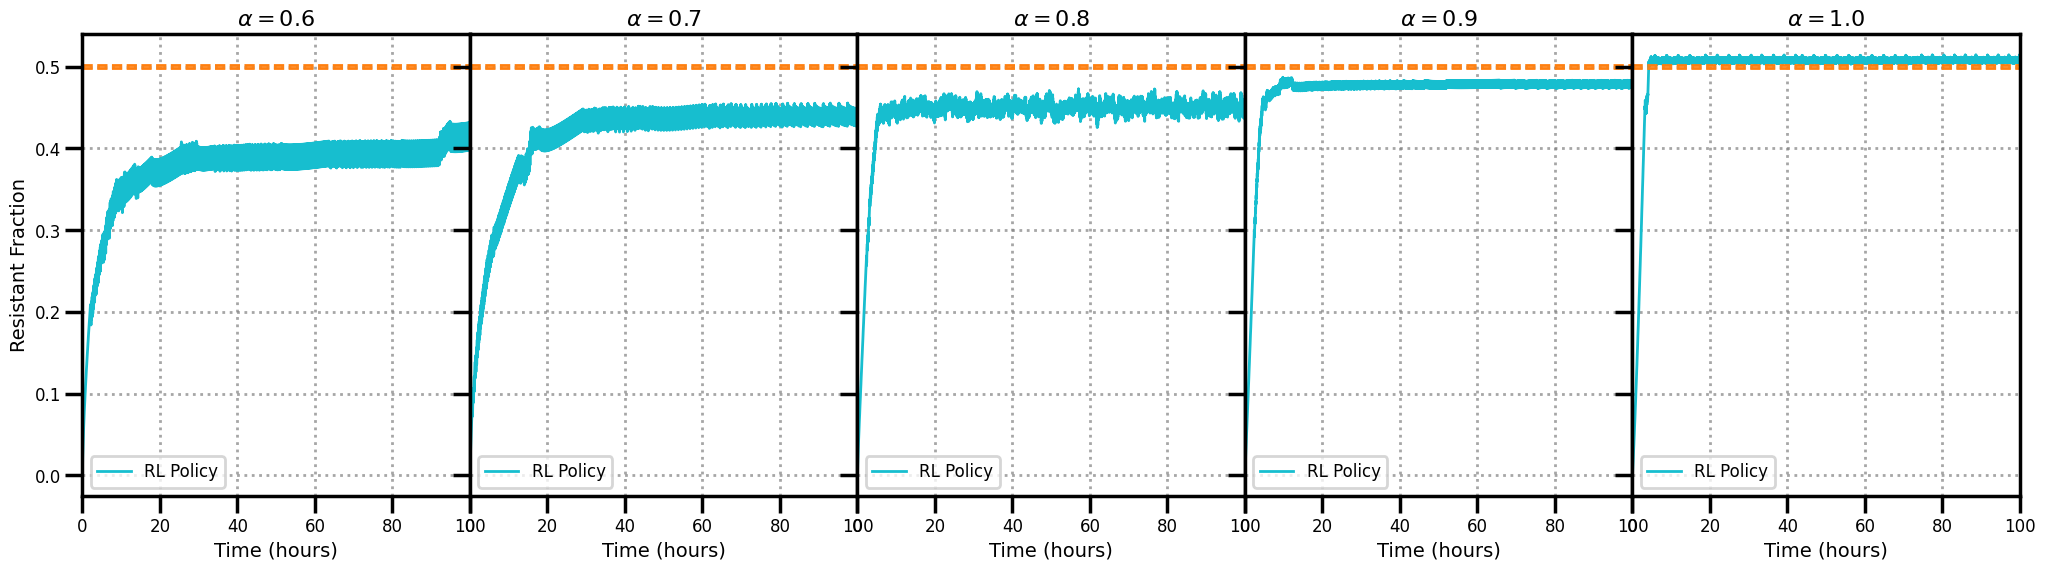

In [30]:
times = np.arange(0, 100, 0.01)[1:]
num_alphas = len(alpha_values)

# Create a figure with a horizontal grid of subplots
fig, axs = plt.subplots(1, num_alphas, figsize=(5 * num_alphas, 6), sharey=True)

for i, alpha in enumerate(alpha_values):
    ax = axs[i]  # Select the i-th subplot

    # Unpack the data:
    all_obs, all_actions, all_fractions = alpha_to_rl_data[alpha]
    # t_hardcoded, hardcoded, hardcoded_fractions = alpha_to_hardcoded_data[alpha]

    # Plot RL Policy
    ax.plot(times, all_fractions, label='RL Policy', color='#17becf', linestyle='-', linewidth=2)

    # Plot Hardcoded Limits of 0.48 & 0.51 as horizontal lines:
    ax.axhline(0.498, color='#ff7f0e', linestyle='--', linewidth=2)
    ax.axhline(0.502, color='#ff7f0e', linestyle='--', linewidth=2)
    # Styling
    ax.set_xlim(0, 100)
    # ax.set_ylim(600, 1000)
    ax.set_xlabel('Time (hours)', fontsize=14)
    if i == 0:
        ax.set_ylabel('Resistant Fraction', fontsize=14)
    else:
        ax.set_ylabel('')
    ax.legend(fontsize=12)
    ax.grid(True, linestyle=':', color='gray', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Optional: Add a title for each subplot
    ax.set_title(rf'$\alpha={alpha}$', fontsize=16)

# Adjust layout to make the subplots touch
plt.subplots_adjust(wspace=0)

# Show the plot
plt.show()


(9999,)
(9999,)
(9999,)
(9999,)
(9999,)


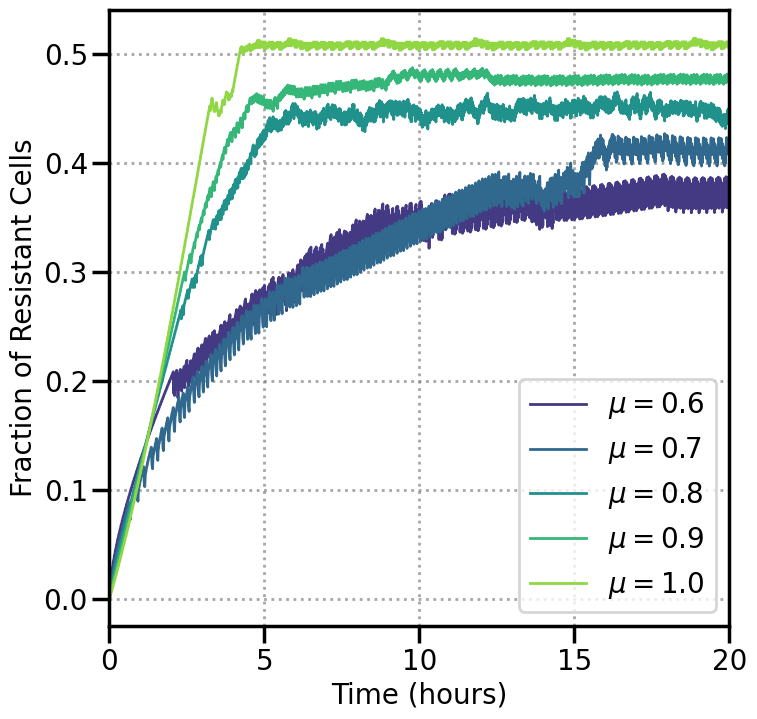

In [44]:
# set matplotlib rc params for colors:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette("viridis", len(alpha_values)))

times = np.arange(0, 100, 0.01)[1:]
num_alphas = len(alpha_values)

# Create a figure with a horizontal grid of subplots
fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharey=True)

# alpha_to_color = {0.6: '#1f77b4', 0.7: '#ff7f0e', 0.8: '#2ca02c', 0.9: '#d62728', 1.0: '#9467bd'}

for i, alpha in enumerate(alpha_values):
    # ax = axs[i]  # Select the i-th subplot

    # Unpack the data:
    all_obs, all_actions, all_fractions = alpha_to_rl_data[alpha]
    # t_hardcoded, hardcoded, hardcoded_fractions = alpha_to_hardcoded_data[alpha]

    # Plot RL Policy
    # label = 'RL Policy' if i == 0 else None
    print(all_obs.shape)
    label = rf'$\mu={alpha}$'
    ax.plot(times, all_fractions, label=label, linestyle='-', linewidth=2)


    # Styling
    ax.set_xlim(0, 20)
    # ax.set_ylim(600, 1000)
    ax.set_xlabel('Time (hours)', fontsize=20)
    if i == 0:
        ax.set_ylabel('Total Number of Cells', fontsize=20)
    else:
        ax.set_ylabel('')
ax.grid(True, linestyle=':', color='gray', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=20)

# Optional: Add a title for each subplot
# ax.set_title(rf'$\alpha={alpha}$', fontsize=16)
ax.set_ylabel('Fraction of Resistant Cells', fontsize=20)
# Plot Hardcoded Limits of 0.48 & 0.51 as horizontal lines:
# ax.axhline(0.49, color='k', linestyle='--', linewidth=2)
# ax.axhline(0.51, color='k', linestyle='--', linewidth=2)#, label='Sweep')

ax.legend(fontsize=20)
# plt.title('RL Policy\'s Effect\non the Resistant Fraction Over Time')

# Show the plot
plt.show()


<Figure size 2000x600 with 0 Axes>

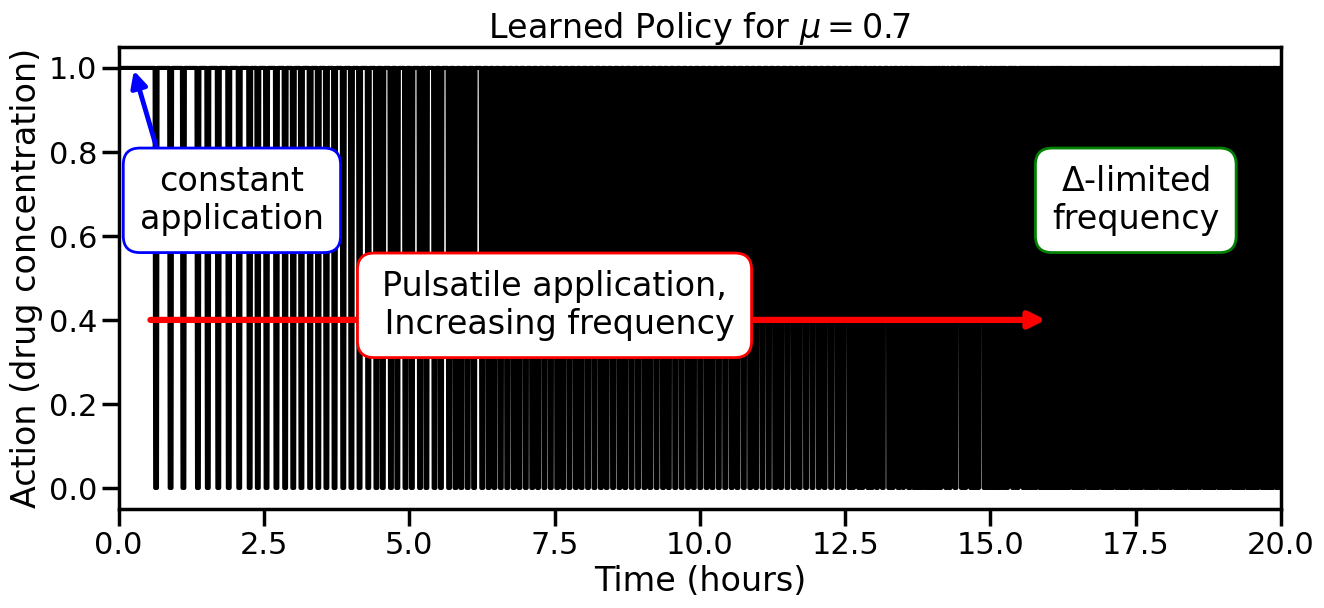

In [43]:
alpha=0.7
sns.set_context('poster')
plt.figure(figsize=(20, 6))
all_obs, all_actions, all_fractions = alpha_to_rl_data[alpha]
x = np.linspace(0, 100, len(all_obs))

# Add annotations for the different regions:
# 0-0.5: constant application:

# Annotation with bracket
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(x,all_actions, 'k')
ax.set_xlim(0,20)
ax.set_ylabel('Action (drug concentration)')
ax.set_xlabel('Time (hours)')
ax.set_title(rf'Learned Policy for $\mu={alpha}$')
# Add a blue arrow annotation
# Adjust the arrow annotation, shift it up by increasing the y-coordinates
ax.annotate('', xy=(0.25, 1.0), xytext=(1.1, 0.6),  # shifted up by adjusting y values
             arrowprops=dict(color='blue', arrowstyle='-|>', lw=3.5))

# Adjust the text annotation, shift it up by increasing the y value
ax.text(1.95, 0.6, "constant\napplication", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))


# Sample axis labels and title
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Action (drug concentration)")
ax.set_title(rf"Learned Policy for $\mu={alpha}$")

# Draw a big arrow to indicate the pulsatile region
ax.annotate('', xy=(16, 0.4), xytext=(0.5, 0.4),
             arrowprops=dict(color='red', arrowstyle='-|>', lw=4.5))

ax.text(7.5, 0.35, "Pulsatile application,\n Increasing frequency", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

# Similar to constant application, show a final region for the dt-limited region at the end
# ax.annotate('', xy=(14, 1.0), xytext=(13, 0.6),
#              arrowprops=dict(color='green', arrowstyle='-|>', lw=3.5))
ax.text(17.5, 0.6, "$\\Delta$-limited\nfrequency", ha='center', va='bottom',
        bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))

plt.savefig('learned_policy.png', dpi=400, bbox_inches='tight')
# Display the plot
plt.show()